# ChatGpt_應用實務_會議錄音轉文字
## 實作讀取會議錄音檔 轉譯成會議逐字稿內容與會議重點摘要


## 系統運作流程
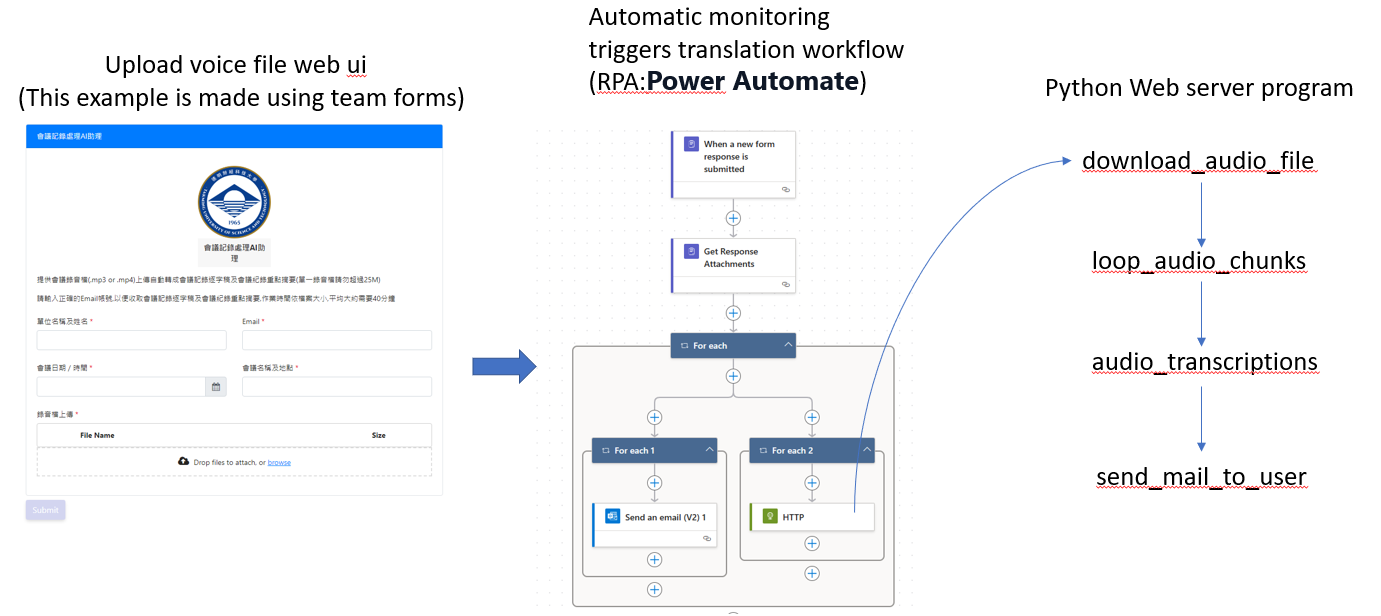

### Program 1:上傳會議錄音檔 WEB UI(本範例使用 team forms, no program code )
### team forms:https://teamforms.app/
### 上傳會議錄音檔 WEB link
### https://web.teamforms.app/teams/55d071b2-22e1-493b-8ee3-c3398e51e253/forms/lr8o1plhp3svunfkcl9/response/lru2fyp3juj5apjbpvn?tenantId=3a50ffe3-d047-4a58-8c21-d2cfeb496c5e
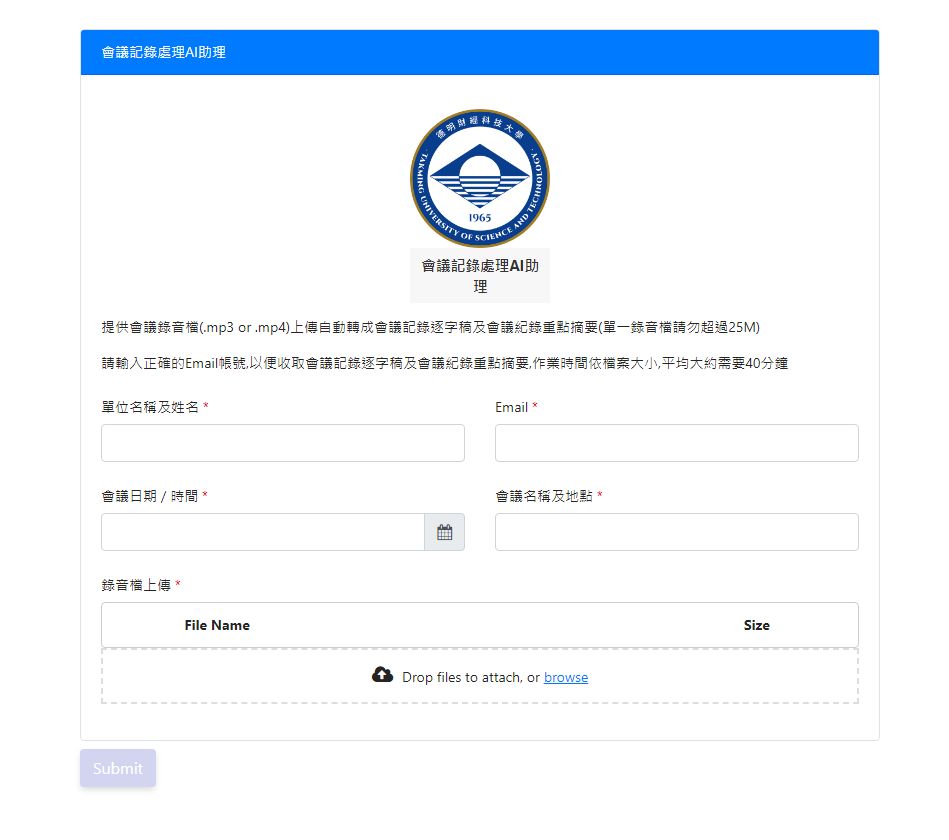


### Program 2:監聽會議錄音檔upload,並觸發 錄音檔轉譯工作(本範例使用 RPA:Power Automate, no program code )
### RPA:流程自動化機器人(https://www.automationanywhere.com/tw/rpa/robotic-process-automation)
### Power Automate:https://www.microsoft.com/zh-tw/power-platform/products/power-automate
### 透過RPA工具軟體,設計好工作流程後,機器人在後台自動運作
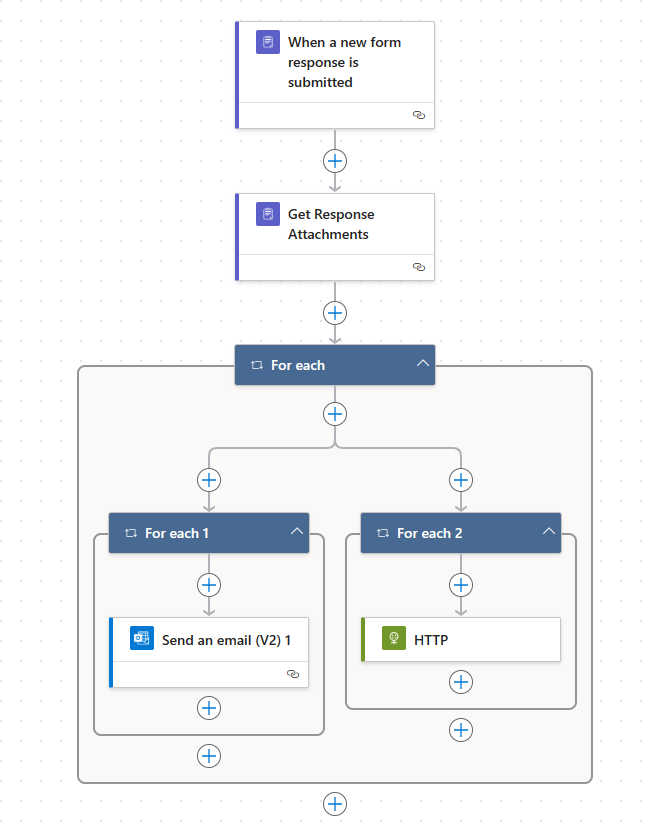

### Program 3:Python Web Server Api 程式
#### 收取檔案link,down load voice file,呼叫ChatGPt api 執行錄音檔轉譯工作,並將結果 mail to user
#### (Web api server:flask,切割voice file:pydub,錄音檔轉譯:whisper, send mail:smtplib )
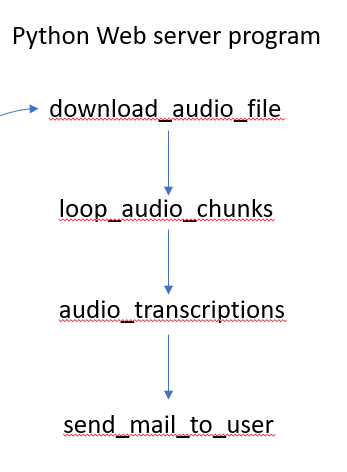

### 底下程式範例,只說明 loop_audio_chunks及audio_transcriptions
### 因為 ChatGPT 只能讀取處理25M以下錄音檔,所以需借助 pydub 做語音檔切割處理
### pydub
#### https://github.com/jiaaro/pydub
###  Python 的 pydub 第三方函式庫，可實現聲音剪輯、混合聲音 ，以及實現聲音反轉的效果。
### 安裝 pydub 函式庫

In [1]:
!pip install pydub

In [2]:
!pip install ffprobe

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ffprobe: filename=ffprobe-0.5-py3-none-any.whl size=3414 sha256=e5c230bf04408bdc33d597fe3e76327032a3247cebdfc467a6785a26d6e2d5fd
  Stored in directory: c:\users\hgtma\appdata\local\pip\cache\wheels\77\95\42\ec9cdac2db6ff5c7fafb2f430715681009ddd232c7704f517f
Successfully built ffprobe


In [5]:
!pip install ffmpeg-python

  Obtaining dependency information for ffmpeg-python from https://files.pythonhosted.org/packages/d7/0c/56be52741f75bad4dc6555991fabd2e07b432d333da82c11ad701123888a/ffmpeg_python-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for ffmpeg-python from https://files.pythonhosted.org/packages/d7/0c/56be52741f75bad4dc6555991fabd2e07b432d333da82c11ad701123888a/ffmpeg_python-0.2.0-py3-none-any.whl.metadata
  Using cached ffmpeg_python-0.2.0-py3-none-any.whl.metadata (1.7 kB)
Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)


### 或在conda 安裝
#### conda install ffmpeg

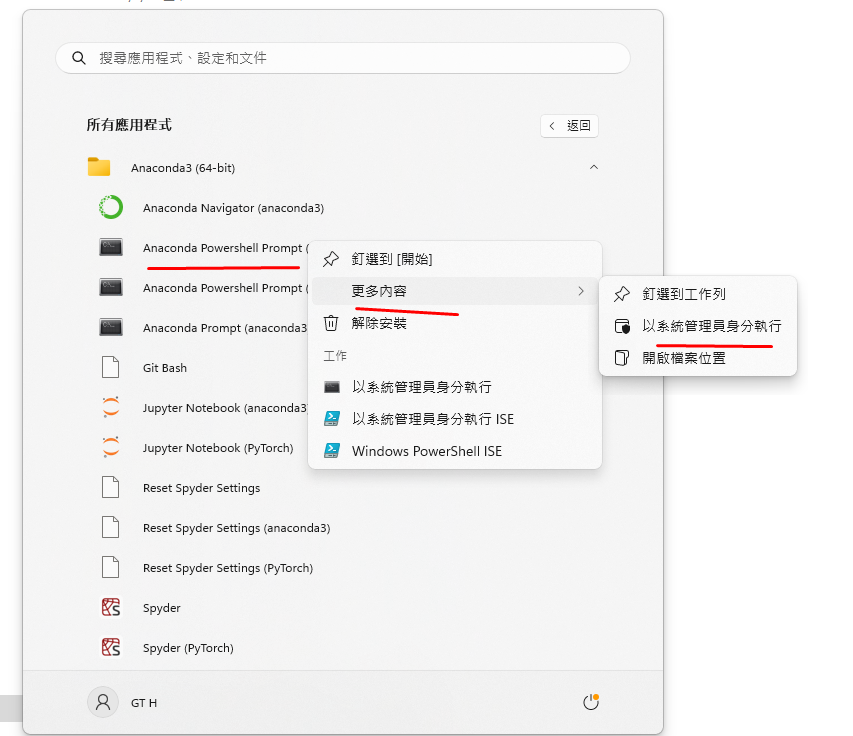

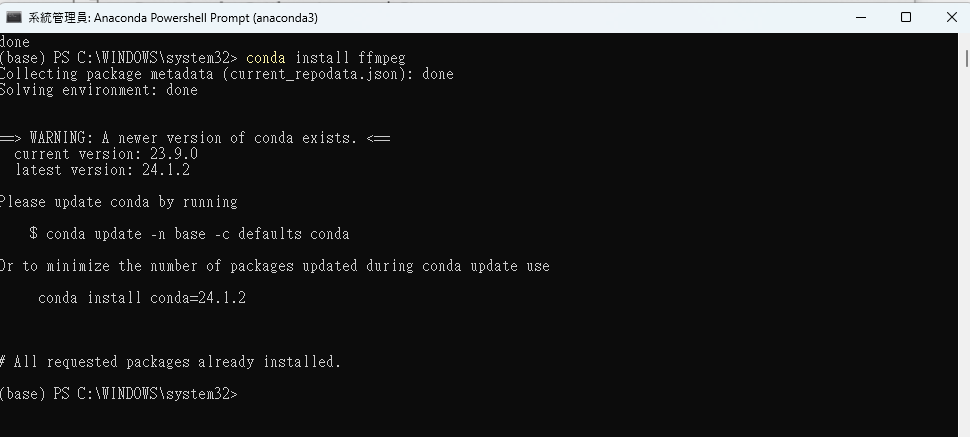

## 安裝 openai
### https://openai.com/chatgpt
### 要呼叫使用chatgpt api,要安裝 openai,並申請api key(使用chatgpt api 要付費)

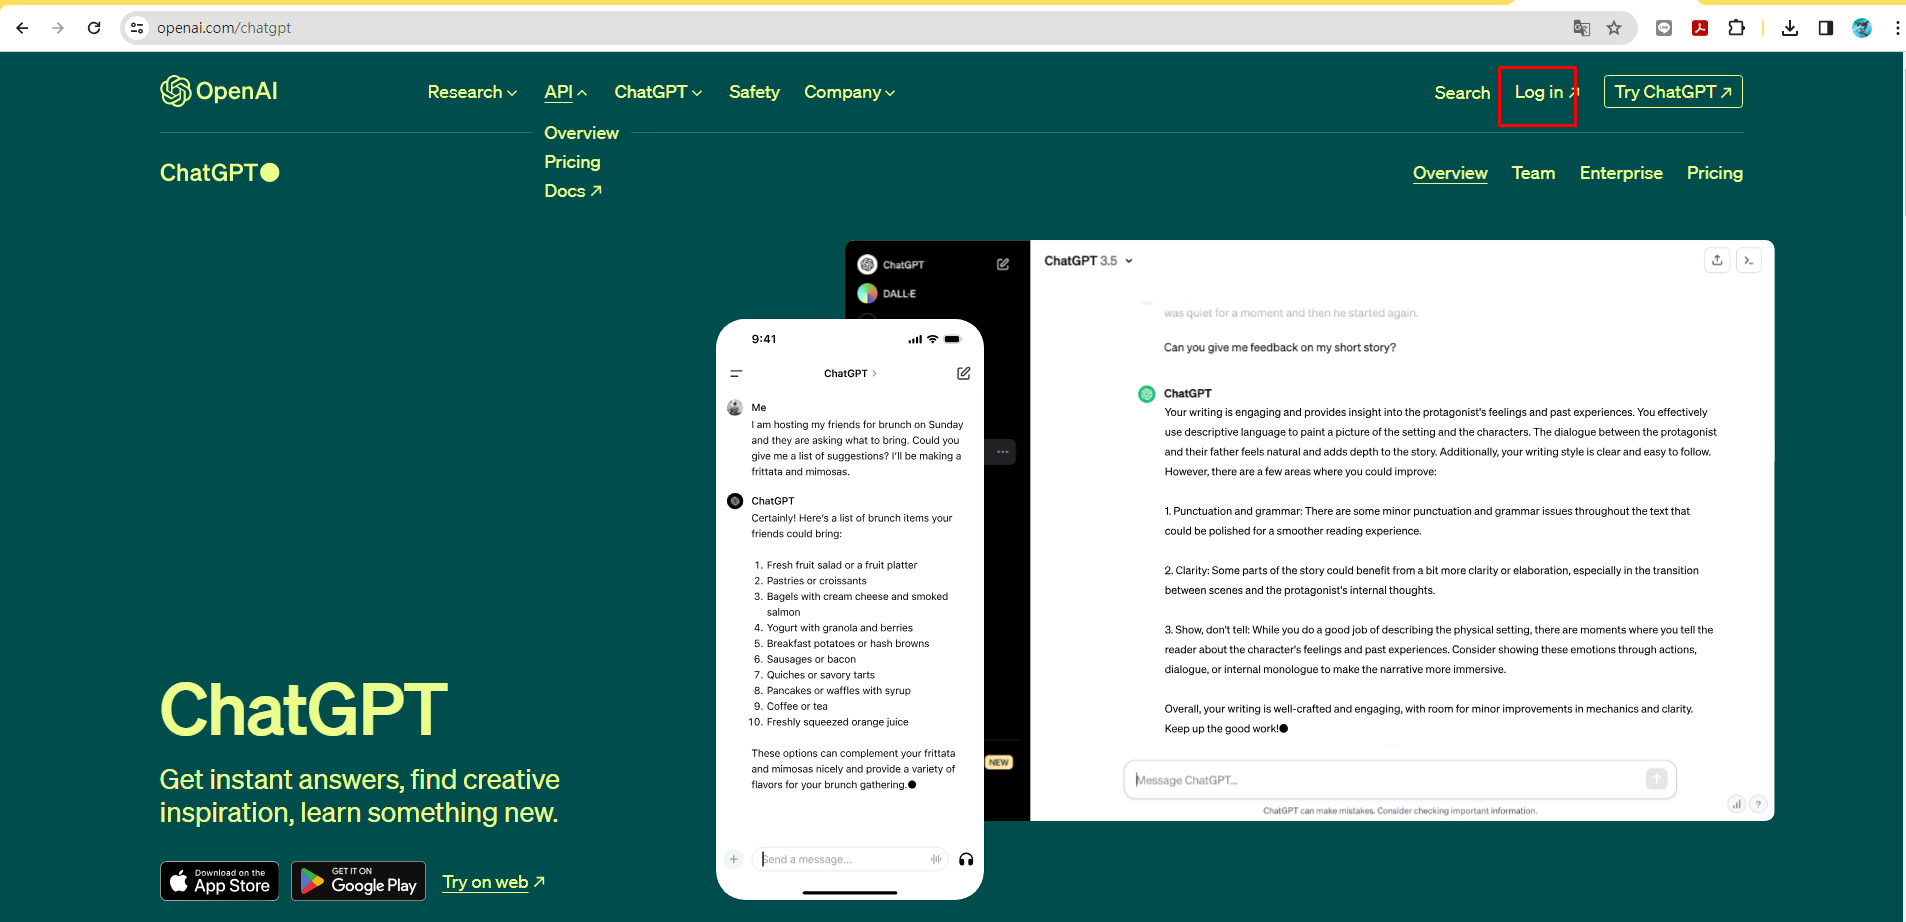

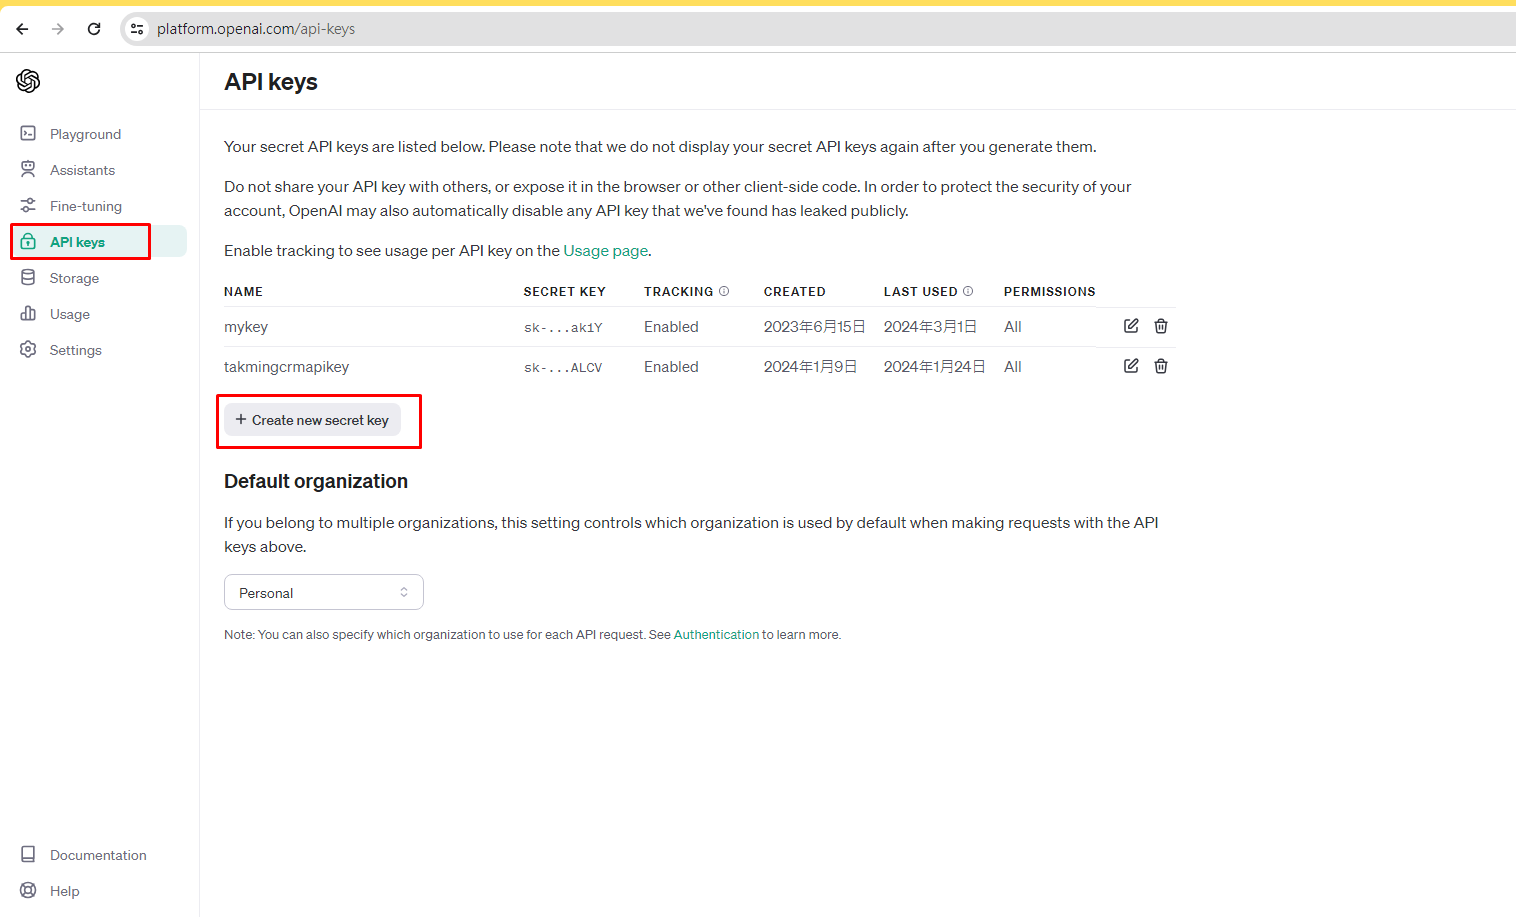

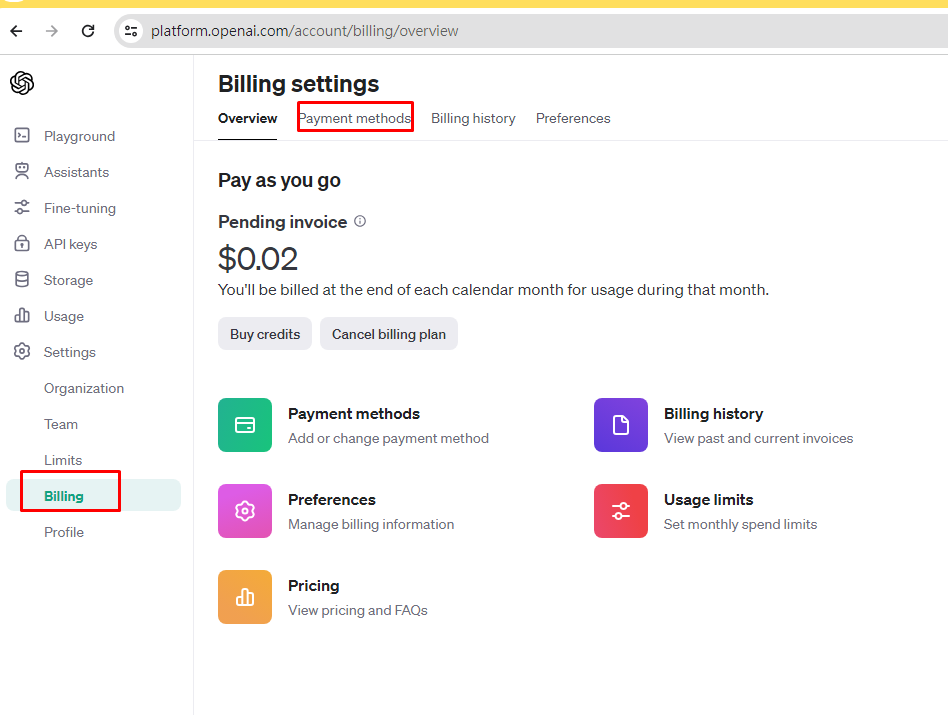

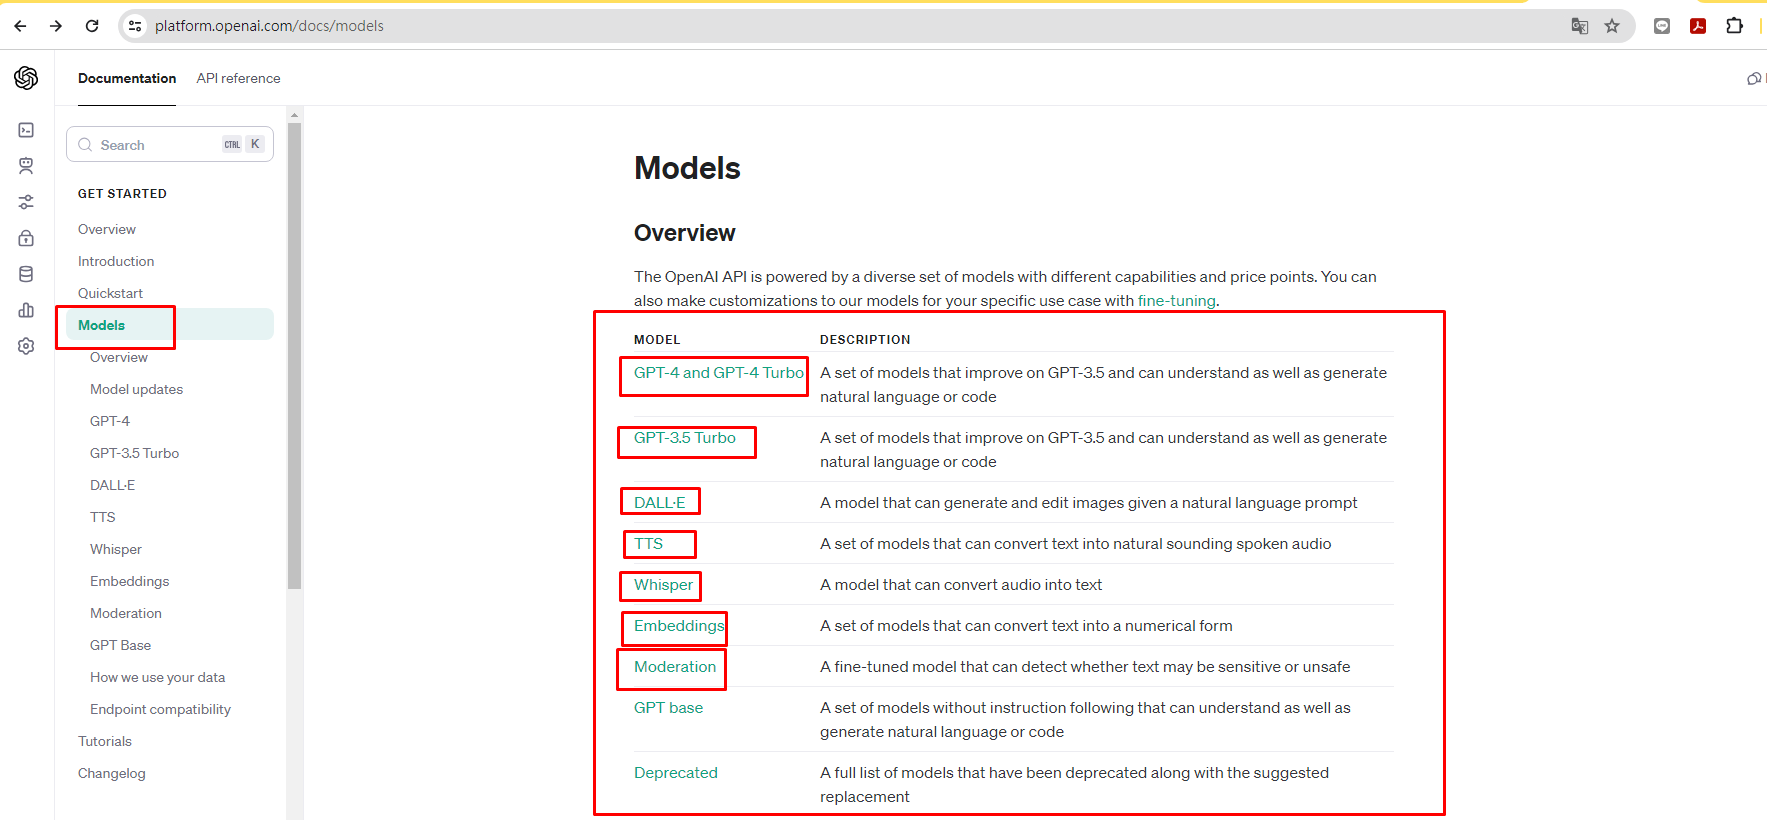

In [6]:
!pip install --upgrade openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/a9/cc/f2bbce0ad52e09cd1aecb724af06385021b42a7317cd5938ba9c8581509d/openai-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ------- -------------------------------- 41.0/227.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ------------ --

### OpenAI whisper:Audio File uploads are currently limited to 25 MB and the following input file types are supported: mp3, mp4, mpeg, mpga, m4a, wav, and webm.

In [ ]:
#chatgpt web api 呼叫程式範例

import requests
import json
import os

openai_api_key = # put yout api key here
if openai_api_key is None:
    raise ValueError("OpenAI API key is not set in environment variables.")

url = "https://api.openai.com/v1/chat/completions"

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {openai_api_key}"
}

data = {
    "model": "gpt-3.5-turbo",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": "Hello!"
        }
    ]
}

response = requests.post(url, headers=headers, json=data)

# Check if the request was successful
if response.status_code == 200:
    print("Response from OpenAI:", response.json())
    print('\n')
    print(response.json()['choices'][0]['message']['content'])
else:
    print("Error:", response.status_code, response.text)


## 安裝OpenCC
### https://github.com/BYVoid/OpenCC
### Open Chinese Convert (OpenCC, 開放中文轉換),中文簡繁轉換開源項目

In [8]:
!pip install opencc

  Obtaining dependency information for opencc from https://files.pythonhosted.org/packages/58/e0/9adbd3983da5bf627a097dbfb81acfa02d68e6e97b8be367968b88dde6f1/OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata
  Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata (12 kB)
Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl (716 kB)


### dotenv 套件:取得環境變數中的值

In [ ]:
!pip install python-dotenv

In [1]:
#檢查目前執行程式的路徑,當作後續讀取檔案參考
import os
os.getcwd()

'D:\\python_ai'

### 下述程式的作法是使用 pydub 的 AudioSegment 函數切割聲音檔,使用pydub.silence 的 split_on_silence函數判斷靜音,並依據出現靜音時來切割聲音檔

In [10]:
#Importing library and thir function
from pydub import AudioSegment
from pydub.silence import split_on_silence

from dotenv import load_dotenv
import os
import openai
#將呼叫chatgpt api 相關model的程式另寫在aimodels.py
from aimodels import OpenAIModel

In [11]:
#OPENAI_API key 不要直接填寫在程式碼內,openai 可能因資安問題不執行chatgpt api呼叫
#請將相關參數放在檔案中,如使用環境設定檔: .env
# .env file 內容
#OPENAI_API =" put your api key value"
#OPENAI_MODEL_ENGINE = 'gpt-3.5-turbo'
#SYSTEM_MESSAGE = 'You are a helpful assistant.'
#
#load_dotenv 讀入環境設定檔
load_dotenv('.env')
#設定openai 的 api_key 
openai.api_key = os.getenv('OPENAI_API')
#
my_secret = os.getenv('OPENAI_API')
model = OpenAIModel(api_key=my_secret)
#
filetypes=""
filename =""
audiostrs=""
#

In [20]:
#
def loop_audio_chunks(audiofile,audiotype):
     stime=0
     vtstring=""
     transciption=""
     vstrings=""
     # 讀取聲音檔,準備切割檔案,pydub可處理的音訊檔格式為wav,mp3,mp4,wma,aac,ogg,flv
     sound = AudioSegment.from_file(audiofile,audiotype)
     #音訊長度:秒數
     print(sound.duration_seconds)
     # 依據靜音,切割檔案,spliting audio files
     #參數 min_silence_len:靜音最短持續時間 ms,silence_thresh:音頻小於多少dB時,視為靜音   
     audio_chunks = split_on_silence(sound, min_silence_len=500, silence_thresh=-35 )   
     #loop is used to iterate over the output list
     for i, chunk in enumerate(audio_chunks):
            output_file = "chunk{0}.{1}".format(i,audiotype)
            print("Exporting file", output_file)
            #輸出截錄的語音檔
            chunk.export(output_file, format=audiotype)
            soundf = AudioSegment.from_file(output_file,audiotype)
            print(soundf.duration_seconds)
            #紀錄聲音檔目前時間
            stimes=stime+soundf.duration_seconds
            #result = model.transcribe(output_file, fp16=False)
            #
            transciption, error_message = model.audio_transcriptions(output_file, 'whisper-1')
            if error_message:
                  transciption, error_message = model.audio_transcriptions(output_file, 'whisper-1')
                  if error_message:
                        transciption=""
            #帶時間區間之逐字稿            
            vtstring=vtstring+"["+str(stime)+"=>"+str(stimes)+"] "+transciption+"\n"
            #純逐字稿
            vstrings=vstrings+transciption+","
            print("["+str(stime)+"=>"+str(stimes)+"] "+transciption+"\n")
   
            stime=stimes
     #帶時間區間之逐字稿檔
     f1 = open(filename+"1.txt", "w",encoding="utf-8")
     f1.write(vtstring)
     f1.close()
     #純逐字稿檔
     f2 = open(filename+"2.txt", "w",encoding="utf-8")
     f2.write(vstrings)
     f2.close()  
     return  vstrings  
    
        
#

In [21]:
voice_file ="31討論提案第13案.mp3"
filetypes = os.path.splitext(voice_file)[1]
filename = os.path.splitext(voice_file)[0]
print(filetypes)

.mp3


In [22]:
if (filetypes=="mp3")or(filetypes==".mp3"):
      #reading from audio mp3 file
 
           audiostrs=loop_audio_chunks(voice_file,"mp3")
     
    
else:
    
           audiostrs=loop_audio_chunks(voice_file,"mp4")

114.23346938775511
Exporting file chunk0.mp3
9.416984126984127
[0=>9.416984126984127] 那個HEPRIN 而且是補充 再補充資料 補充資料喔 HEPRIN也是一個老藥

Exporting file chunk1.mp3
20.300997732426303
[9.416984126984127=>29.71798185941043] 改憲政主席都給我比較簡單的 那基本上他也是提高藥價 那Heparin用途不用講了 它是Anticoagulant 像心肌梗塞那都非用不可 所以他也是早就認定 是不可替代的特殊藥品 那麼一樣廠商現在是說不付成本 所以要提高藥價

Exporting file chunk2.mp3
6.716009070294785
[29.71798185941043=>36.43399092970522] 那它比較複雜就是因為 Heparin本身它的規格量就很多種 有5、10、20、50

Exporting file chunk3.mp3
0.8980045351473923
[36.43399092970522=>37.33199546485261] 有四種規格量

Exporting file chunk4.mp3
3.3850113378684807
[37.33199546485261=>40.717006802721095] 然後問題是他的公司就是廠家有幾個有七家公司

Exporting file chunk5.mp3
17.827006802721087
[40.717006802721095=>58.54401360544218] 所以不是每一家公司都有這四種規格量 有些有 有些沒有 然後每個公司的價錢又不一樣 所以當時核價是說要怎麼給他提高要價 是非常的困難 那我必須說感謝我們的主席 招支委員 招支非常花了非常多的精神 去去核這個價錢

Exporting file chunk6.mp3
10.646009070294784
[58.54401360544218=>69.19002267573697] 所以基本上我們核價的原則就是說我們會來選出 他的50 25 50裡面我們是以他的25做標準 和25的價錢其他再用規格量換算

Exporting f

In [23]:
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "提供以下文字之繁體中文摘要: " + audiostrs+ "\n A:"
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4-1106-preview')   
if error_message:
          print(error_message)    
else:
          print(response)
#摘要
f3 = open(filename+"3.txt", "w",encoding="utf-8")
f3.write(response)
f3.close()   

這段文字討論的是Heparin藥品的價格調整問題。Heparin是一種不可替代、必需的抗凝血藥物，廣泛用於治療心肌梗塞等情況。文字提到Heparin有多種劑量規格，包括5、10、20、50單位，但不是每家生產商都有全規格。價格覈定過程中，有多家公司參與，價格不一，造成核定困難。為了制定價格，採用了成本分析法和國際中位價法來進行計算，最終以25單位的價格為基準進行換算。如果換算後的價格比成本還低，則會保持原價，反之則重新計算價格。文中感謝了相關主席與委員在覈價過程中所付出的努力。
